In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
from itertools import product
from functools import partial

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

import pandas as pd
import seaborn as sns

from pathlib import Path
from sbibm.utils.io import get_tensor_from_csv

from notebook import nre_gamma_default, prepare_df_for_plot, get_metrics, figsize

import numpy as np

In [3]:
linestyles = {2: "dashed", 3: "solid"}
avglogratio_name = r"Mean -$\log \hat{r}_{\mathbf{w}}(\mathbf{x} \mid \mathbf{\theta})$"
validation_loss_name = "Mean validation loss"
legend_title = "Contrastive" + "\n" + "parameters"
alpha=0.7

height = 2.5

def plot_avg_log_ratios(path: pd.Series, num_blocks: pd.Series, **kwargs):
    ax = plt.gca()
    for index in path.index:
        ax.plot(
            -get_tensor_from_csv(Path(path[index]) / "avg_log_ratios.csv"), linestyle=linestyles[num_blocks[index]], 
            alpha=alpha,
            **kwargs
        )
    ax.set_xscale("log")
    # ax.set_yscale("symlog")

# def plot_avg_log_ratios(path: pd.Series, num_blocks: pd.Series, **kwargs):
#     ax = plt.gca()
#     avglogratios = [-get_tensor_from_csv(Path(path[index]) / "avg_log_ratios.csv") for index in path.index]
#     print(path)
#     # df = pd.Dafa
#     for index in path.index:
#         ax.plot(
#             -get_tensor_from_csv(Path(path[index]) / "avg_log_ratios.csv"), linestyle=linestyles[num_blocks[index]], 
#             **kwargs
#         )
#     ax.set_xscale("log")
#     ax.set_yscale("symlog")

def plot_validation_loss(path: pd.Series, num_blocks: pd.Series, **kwargs):
    ax = plt.gca()
    for index in path.index:
        ax.plot(
            get_tensor_from_csv(Path(path[index]) / "validation_loss.csv"), 
            linestyle=linestyles[num_blocks[index]], 
            alpha=alpha,
            **kwargs
        )
    ax.set_xscale("log")
    # ax.set_yscale("log")

    
def get_first_of_group(df: pd.DataFrame) -> pd.DataFrame:
    grp = df.groupby(["task", "algorithm", "gamma", "num_blocks", "num_contrastive_parameters"])
    return grp.first().reset_index()

In [4]:
df_prior = get_metrics(
    [
        "metrics-prior.csv",
    ],
    "prior",
)
df_joint = get_metrics(
    [
        "metrics-joint.csv",
    ],
    "joint",
)
df_bench = get_metrics(
    [
        "metrics-bench.csv",
    ],
    "bench",
)
df_sameval = get_metrics(
    [
        "metrics-sameval.csv",
    ],
    "sameval",
)

df = pd.concat([df_joint, df_prior, df_bench, df_sameval], ignore_index=True)
df["gamma"] = df["gamma"].fillna(nre_gamma_default)

print(len(df))
print(df.columns)
print(df["algorithm"].unique())
print(df["task"].unique())
print(df["num_contrastive_parameters"].unique())
df.head()

1749
Index(['task', 'seed', 'algorithm', 'K', 'num_atoms',
       'num_contrastive_parameters', 'gamma', 'extra_theta_factor',
       'hidden_features', 'num_blocks', 'AVG_LOG_RATIO', 'RT', 'C2ST_Z-01',
       'MMD-01', 'MEDDIST-01', 'NLTP-01', 'C2ST_Z-02', 'MMD-02', 'MEDDIST-02',
       'NLTP-02', 'C2ST_Z-03', 'MMD-03', 'MEDDIST-03', 'NLTP-03', 'C2ST_Z-04',
       'MMD-04', 'MEDDIST-04', 'NLTP-04', 'C2ST_Z-05', 'MMD-05', 'MEDDIST-05',
       'NLTP-05', 'C2ST_Z-06', 'MMD-06', 'MEDDIST-06', 'NLTP-06', 'C2ST_Z-07',
       'MMD-07', 'MEDDIST-07', 'NLTP-07', 'C2ST_Z-08', 'MMD-08', 'MEDDIST-08',
       'NLTP-08', 'C2ST_Z-09', 'MMD-09', 'MEDDIST-09', 'NLTP-09', 'C2ST_Z-10',
       'MMD-10', 'MEDDIST-10', 'NLTP-10', 'NLTP', 'num_simulations_simulator',
       'path', 'folder', 'reuse', 'expr'],
      dtype='object')
['NRE-B' 'CNRE']
['slcp' 'two_moons' 'gaussian_mixture']
[200 100 150  10  25  75   2  50]


,task,seed,algorithm,K,num_atoms,num_contrastive_parameters,gamma,extra_theta_factor,hidden_features,num_blocks,...,C2ST_Z-10,MMD-10,MEDDIST-10,NLTP-10,NLTP,num_simulations_simulator,path,folder,reuse,expr
0,slcp,980488309,NRE-B,200,200,200,inf,False,50,2,...,0.82350,0.042112,2.018930,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/joint/20-18-33/15,15,NaN,joint
1,two_moons,2456924169,NRE-B,100,100,100,inf,False,50,2,...,0.58885,0.002229,0.093457,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/joint/20-18-33/5,5,NaN,joint
2,gaussian_mixture,4264851724,NRE-B,150,150,150,inf,False,50,2,...,0.69175,0.010666,0.745870,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/joint/20-18-33/22,22,NaN,joint
3,slcp,2733803972,NRE-B,10,10,10,inf,False,50,2,...,0.87740,0.125824,2.029766,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/joint/20-18-33/9,9,NaN,joint
4,slcp,3120623302,NRE-B,25,25,25,inf,False,50,2,...,0.87680,0.126860,1.861489,NaN,NaN,20504576.0,/home/ben/sci/cnre/infinite/joint/20-18-33/10,10,NaN,joint


## specific example plots

In [5]:
scale = 2.0
new_figsize = (figsize[0] * scale, figsize[1] * scale)

In [6]:
def convert_to_page_width(a, b):
    aspect_ratio = a / b
    x = 5.5
    y = (1 / aspect_ratio) * x
    return x, y

In [7]:
df_specific = df[(df["task"] == "slcp") & (df["gamma"].isin([1.0, nre_gamma_default])) & (df["num_blocks"] == 2)]
grp = df_specific.groupby(["task", "algorithm", "num_contrastive_parameters"])
df_specific = grp.first().reset_index()

df_specific["num_blocks"] = 3  # this is a hack to make the line solid

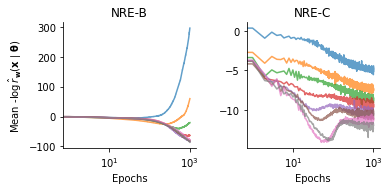

In [8]:
g = sns.FacetGrid(
    df_specific, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="algorithm", 
    height=4,
    sharey=False,
    col_order=["NRE-B", "CNRE"],
    # legend_out=True,
)

g.map(plot_avg_log_ratios, "path", "num_blocks")
# g.add_legend()
ax = g.axes_dict[('slcp', 'CNRE')]
ax.set_xlabel("Epochs")
ax.set_title("NRE-C")

ax = g.axes_dict[('slcp', 'NRE-B')]
ax.set_xlabel("Epochs")
ax.set_title("NRE-B")
ax.set_ylabel(avglogratio_name)

fig = plt.gcf()
current_figsize = fig.get_size_inches()
fig.set_size_inches(*convert_to_page_width(*current_figsize))
fig.tight_layout()

plt.savefig("specific-avglogratio.pdf", dpi=300, bbox_inches="tight")

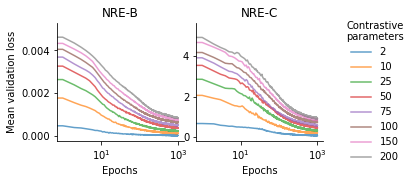

In [9]:
g = sns.FacetGrid(
    df_specific, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="algorithm", 
    height=4,
    sharey=False,
    col_order=["NRE-B", "CNRE"],
    legend_out=True,
)
g.map(plot_validation_loss, "path", "num_blocks")
ax = g.axes_dict[('slcp', 'CNRE')]
ax.set_xlabel("Epochs")
ax.set_title("NRE-C")

ax = g.axes_dict[('slcp', 'NRE-B')]
ax.set_xlabel("Epochs")
ax.set_title("NRE-B")
ax.set_ylabel(validation_loss_name)

g.add_legend()
g.legend.set_title(legend_title)

fig = plt.gcf()
# fig.tight_layout()
current_figsize = fig.get_size_inches()
fig.set_size_inches(*convert_to_page_width(*current_figsize))


plt.savefig("specific-validation.pdf", dpi=300, bbox_inches="tight")

## sameval
This replaces bench but it only contains the ones I want

In [10]:
def plot_either_val_or_avglogratio(path: pd.Series, metric: pd.Series, num_blocks: pd.Series, **kwargs):
    ax = plt.gca()
    for index in path.index:
        if metric[index] == "validation":
            time_series = get_tensor_from_csv(Path(path[index]) / "validation_loss.csv")
            yscale = "log"
        if metric[index] == "avglogratio":
            time_series = -get_tensor_from_csv(Path(path[index]) / "avg_log_ratios.csv")
            # yscale = "symlog"
            yscale = "linear"
        ax.plot(time_series, linestyle=linestyles[num_blocks[index]], alpha=alpha, **kwargs)
    ax.set_xscale("log")
    ax.set_yscale(yscale)

dict_keys([('validation', 0.001), ('validation', 0.01), ('validation', 0.1), ('validation', 1.0), ('validation', 10.0), ('validation', 100.0)])


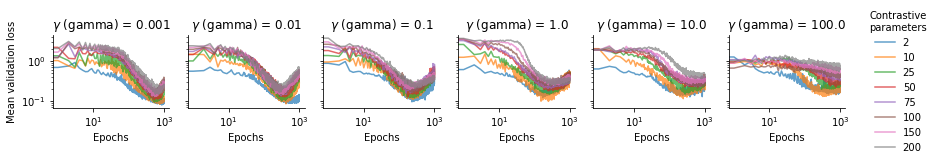

In [11]:
df_sameval = df[
    (df["algorithm"] == "CNRE")
    # (df["algorithm"] == "NRE-B")
    & (df["expr"] == "sameval") 
    & (df["task"] == "slcp")
    & (df["num_blocks"] == 3)
].copy()

# df_sameval_copy = df_sameval.copy()
# df_sameval_copy["metric"] = "avglogratio"

df_sameval["metric"] = "validation"

# df_sameval = pd.concat([df_sameval, df_sameval_copy], ignore_index=True)
grp = df_sameval.groupby(["task", "algorithm", "gamma", "num_blocks", "num_contrastive_parameters", "metric"])
df_sameval = grp.first().reset_index()

g = sns.FacetGrid(
    df_sameval, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="metric",
    col="gamma", 
    height=2,
    sharey="row",
    # legend_out=True,
    legend_out=False
)

g.figure.tight_layout()
g.map(plot_either_val_or_avglogratio, "path", "metric", "num_blocks")

g.add_legend()
sns.move_legend(g, "center left", bbox_to_anchor=(1.0, 0.5), frameon=False)
g.legend.set_title(legend_title)

print(g.axes_dict.keys())
# ax = g.axes_dict[('avglogratio', 0.001)]
# ax.set_ylabel(avglogratio_name)

ax = g.axes_dict[('validation', 0.001)]
ax.set_ylabel(validation_loss_name)

for ax in g.axes[0, :]:
    value = ax.get_title().split()[-1]
    ax.set_title(fr"$\gamma$ (gamma) = {value}")
    ax.set_xlabel("Epochs")

plt.savefig("slcp-validation-sameval.pdf", dpi=300, bbox_inches="tight")

## bench

### slcp val and ratio

dict_keys([('avglogratio', 0.001), ('avglogratio', 0.01), ('avglogratio', 0.1), ('avglogratio', 1.0), ('avglogratio', 10.0), ('avglogratio', 100.0), ('validation', 0.001), ('validation', 0.01), ('validation', 0.1), ('validation', 1.0), ('validation', 10.0), ('validation', 100.0)])


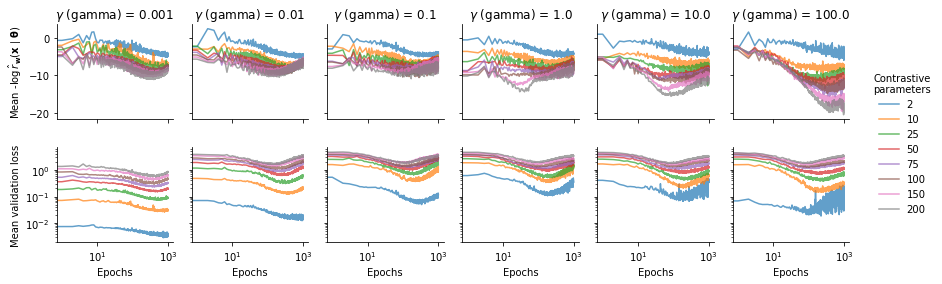

In [12]:
df_cnre_bench = df[
    (df["algorithm"] == "CNRE")
    & (df["expr"] == "bench") 
    & (df["task"] == "slcp")
    & (df["num_blocks"] == 3)
].copy()

df_cnre_bench_copy = df_cnre_bench.copy()
df_cnre_bench_copy["metric"] = "validation"

df_cnre_bench["metric"] = "avglogratio"

df_cnre_bench = pd.concat([df_cnre_bench, df_cnre_bench_copy], ignore_index=True)
grp = df_cnre_bench.groupby(["task", "algorithm", "gamma", "num_blocks", "num_contrastive_parameters", "metric"])
df_cnre_bench = grp.first().reset_index()

g = sns.FacetGrid(
    df_cnre_bench, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="metric",
    col="gamma", 
    height=2,
    sharey="row",
    # legend_out=True,
    legend_out=False
)

g.figure.tight_layout()
g.map(plot_either_val_or_avglogratio, "path", "metric", "num_blocks")

g.add_legend()
sns.move_legend(g, "center left", bbox_to_anchor=(1.0, 0.5), frameon=False)
g.legend.set_title(legend_title)

print(g.axes_dict.keys())
ax = g.axes_dict[('avglogratio', 0.001)]
ax.set_ylabel(avglogratio_name)

ax = g.axes_dict[('validation', 0.001)]
ax.set_ylabel(validation_loss_name)

for ax in g.axes[0, :]:
    value = ax.get_title().split()[-1]
    ax.set_title(fr"$\gamma$ (gamma) = {value}")
    
for ax in g.axes[1, :]:
    ax.set_title("")
    ax.set_xlabel("Epochs")

plt.savefig("slcp-validation-avglogratio-bench.pdf", dpi=300, bbox_inches="tight")

dict_keys([('validation', 0.001), ('validation', 0.01), ('validation', 0.1), ('validation', 1.0), ('validation', 10.0), ('validation', 100.0)])


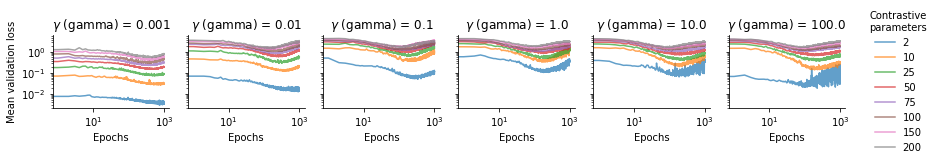

In [13]:
df_cnre_bench = df[
    (df["algorithm"] == "CNRE")
    & (df["expr"] == "bench") 
    & (df["task"] == "slcp")
    & (df["num_blocks"] == 3)
].copy()

df_cnre_bench["metric"] = "validation"

# df_cnre_bench = pd.concat([df_cnre_bench, df_cnre_bench_copy], ignore_index=True)
grp = df_cnre_bench.groupby(["task", "algorithm", "gamma", "num_blocks", "num_contrastive_parameters", "metric"])
df_cnre_bench = grp.first().reset_index()

g = sns.FacetGrid(
    df_cnre_bench, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="metric",
    col="gamma", 
    height=2,
    sharey="row",
    # legend_out=True,
    legend_out=False
)

g.figure.tight_layout()
g.map(plot_either_val_or_avglogratio, "path", "metric", "num_blocks")

g.add_legend()
sns.move_legend(g, "center left", bbox_to_anchor=(1.0, 0.5), frameon=False)
g.legend.set_title(legend_title)

print(g.axes_dict.keys())
# ax = g.axes_dict[('avglogratio', 0.001)]
# ax.set_ylabel(avglogratio_name)

ax = g.axes_dict[('validation', 0.001)]
ax.set_ylabel(validation_loss_name)

for ax in g.axes[0, :]:
    value = ax.get_title().split()[-1]
    ax.set_title(fr"$\gamma$ (gamma) = {value}")
    ax.set_xlabel("Epochs")

plt.savefig("slcp-validation-bench.pdf", dpi=300, bbox_inches="tight")

### avg log ratio

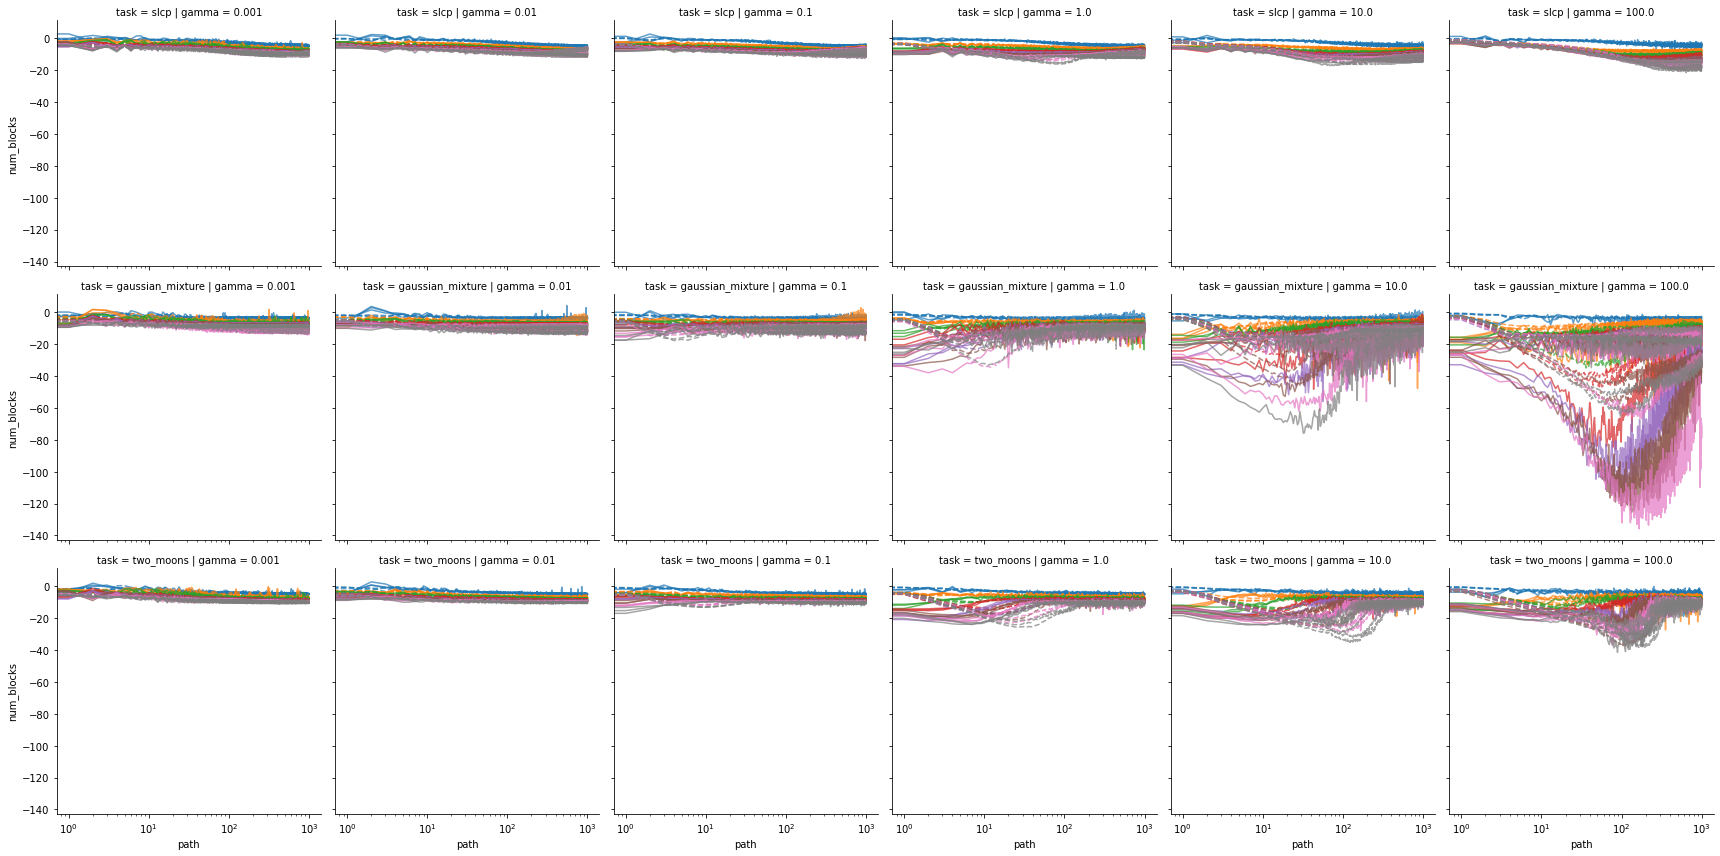

In [14]:
df_cnre_bench = df[(df["algorithm"] == "CNRE") & (df["expr"] == "bench")]
g = sns.FacetGrid(
    df_cnre_bench, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="gamma", 
    height=4,
)
g.map(plot_avg_log_ratios, "path", "num_blocks")

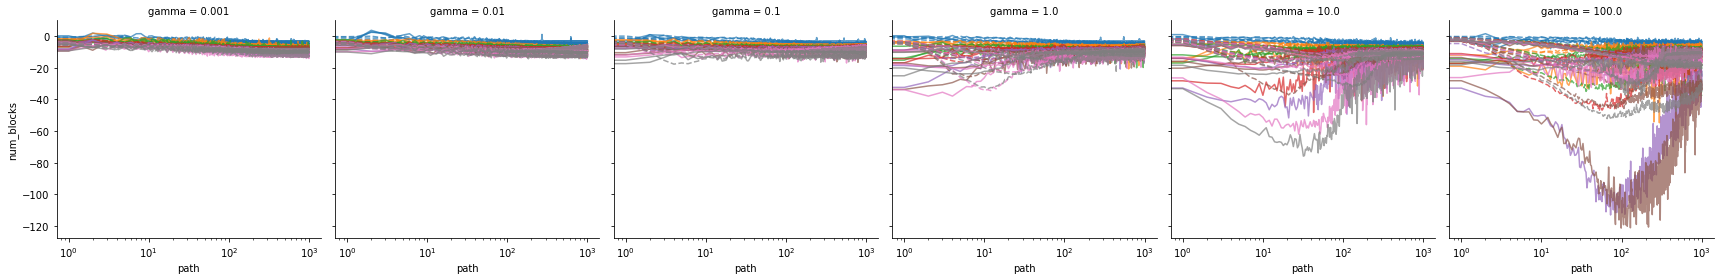

In [15]:
df_cnre_bench = df[(df["algorithm"] == "CNRE") & (df["expr"] == "bench")]
grp = df_cnre_bench.groupby(["task", "algorithm", "gamma", "num_blocks", "num_contrastive_parameters"])
df_cnre_bench = grp.first().reset_index()

g = sns.FacetGrid(
    df_cnre_bench, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    # row="task",
    col="gamma", 
    height=4,
)
g.map(plot_avg_log_ratios, "path", "num_blocks")

### validation loss

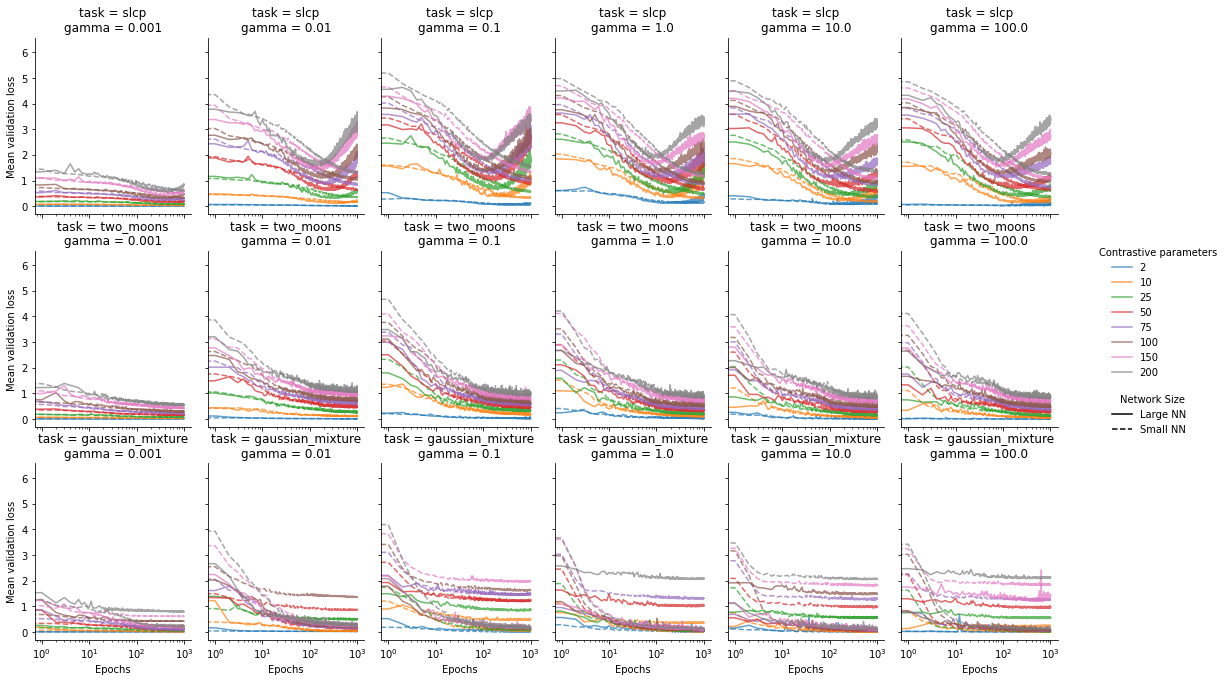

In [16]:
g = sns.FacetGrid(
    df_cnre_bench, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="gamma", 
    row_order=['slcp', 'two_moons', 'gaussian_mixture'],
    # hue_kws=hue_kws,
    height=height,
)
g.map(plot_validation_loss, "path", "num_blocks")



title_proxy = Rectangle((0,0), 0, 0, color='w')
solid_proxy = Line2D([], [], color="k", linestyle="-")
dashd_proxy = Line2D([], [], color="k", linestyle="--")

legend_data = g._legend_data
title_text = "\nNetwork Size"
legend_data[title_text] = title_proxy
legend_data["Large NN"] = solid_proxy
legend_data["Small NN"] = dashd_proxy

g.add_legend(legend_data=legend_data, label_order=legend_data.keys(), )

for item, label in zip(g.legend.legendHandles, g.legend.texts):
    if label._text  in [title_text]:
        width=item.get_window_extent(fig.canvas.get_renderer()).width
        label.set_ha('left')
        label.set_position((-1*width,0))

g.legend.set_title("Contrastive parameters")


for ax in g.axes[:, 0]:
    ax.set_ylabel("Mean validation loss")

for ax in g.axes[-1, :]:
    ax.set_xlabel("Epochs")

for ax in g.axes.flatten():
    title_parts = [x.strip() for x in ax.get_title().split("|")]
    ax.set_title(f"{title_parts[0]}\n{title_parts[1]}")
plt.subplots_adjust(top=1.2)
    
plt.savefig("grid-validation-bench.pdf", dpi=300, bbox_inches="tight")

## joint

### avg log ratio

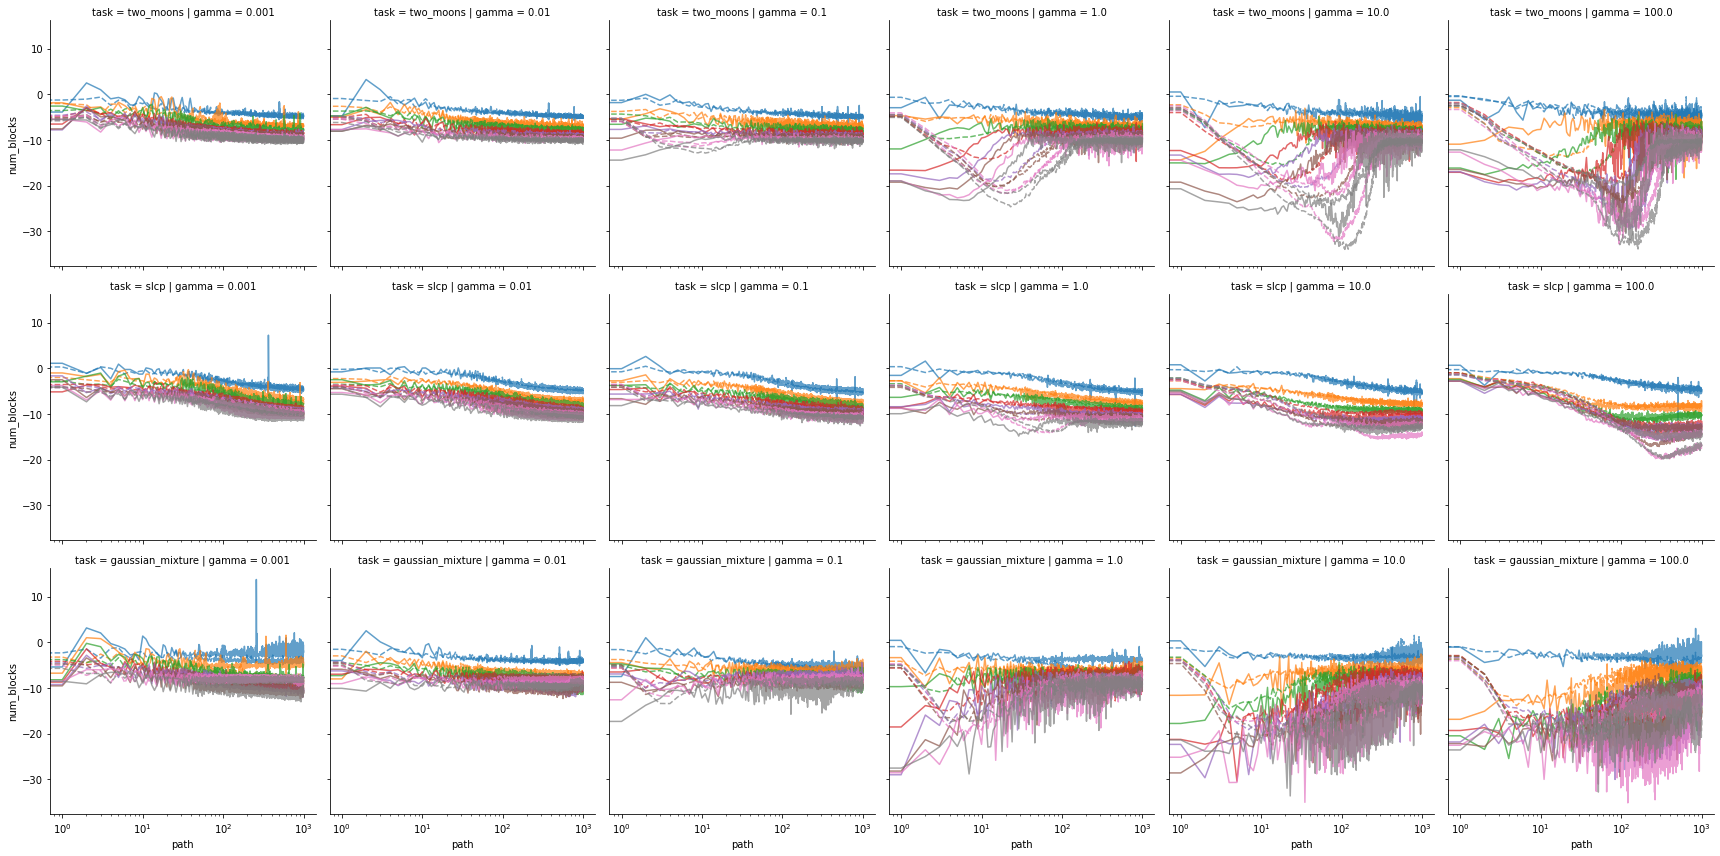

In [17]:
df_cnre_joint = df[(df["algorithm"] == "CNRE") & (df["expr"] == "joint")]
g = sns.FacetGrid(
    df_cnre_joint, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="gamma", 
    height=4,
    
)
g.map(plot_avg_log_ratios, "path", "num_blocks")

### validation loss

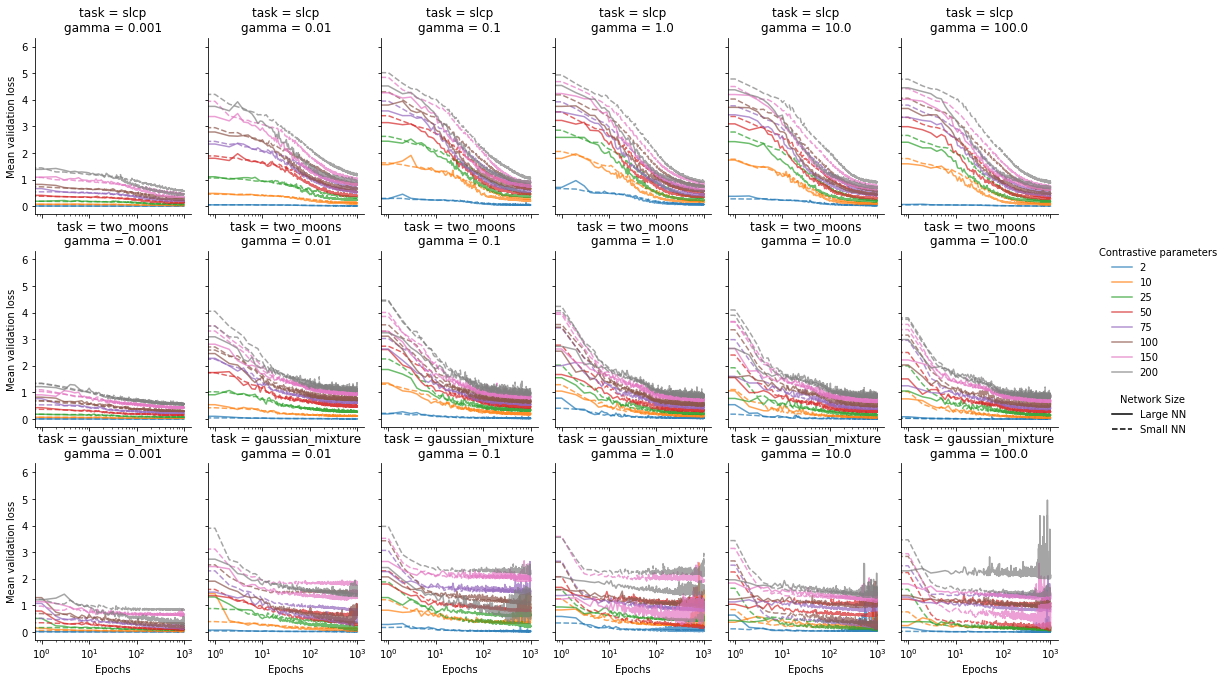

In [18]:
g = sns.FacetGrid(
    df_cnre_joint, 
    # x="path",  #to look up series
    row_order=['slcp', 'two_moons', 'gaussian_mixture'],
    hue="num_contrastive_parameters",
    row="task",
    col="gamma", 
    height=height,
)
g.map(plot_validation_loss, "path", "num_blocks")

title_proxy = Rectangle((0,0), 0, 0, color='w')
solid_proxy = Line2D([], [], color="k", linestyle="-")
dashd_proxy = Line2D([], [], color="k", linestyle="--")

legend_data = g._legend_data
title_text = "\nNetwork Size"
legend_data[title_text] = title_proxy
legend_data["Large NN"] = solid_proxy
legend_data["Small NN"] = dashd_proxy

g.add_legend(legend_data=legend_data, label_order=legend_data.keys(), )

for item, label in zip(g.legend.legendHandles, g.legend.texts):
    if label._text  in [title_text]:
        width=item.get_window_extent(fig.canvas.get_renderer()).width
        label.set_ha('left')
        label.set_position((-1*width,0))

g.legend.set_title("Contrastive parameters")

for ax in g.axes[:, 0]:
    ax.set_ylabel("Mean validation loss")

for ax in g.axes[-1, :]:
    ax.set_xlabel("Epochs")

for ax in g.axes.flatten():
    title_parts = [x.strip() for x in ax.get_title().split("|")]
    ax.set_title(f"{title_parts[0]}\n{title_parts[1]}")
plt.subplots_adjust(top=1.2)
    
plt.savefig("grid-validation-joint.pdf", dpi=300, bbox_inches="tight")

## prior

### avg log ratio

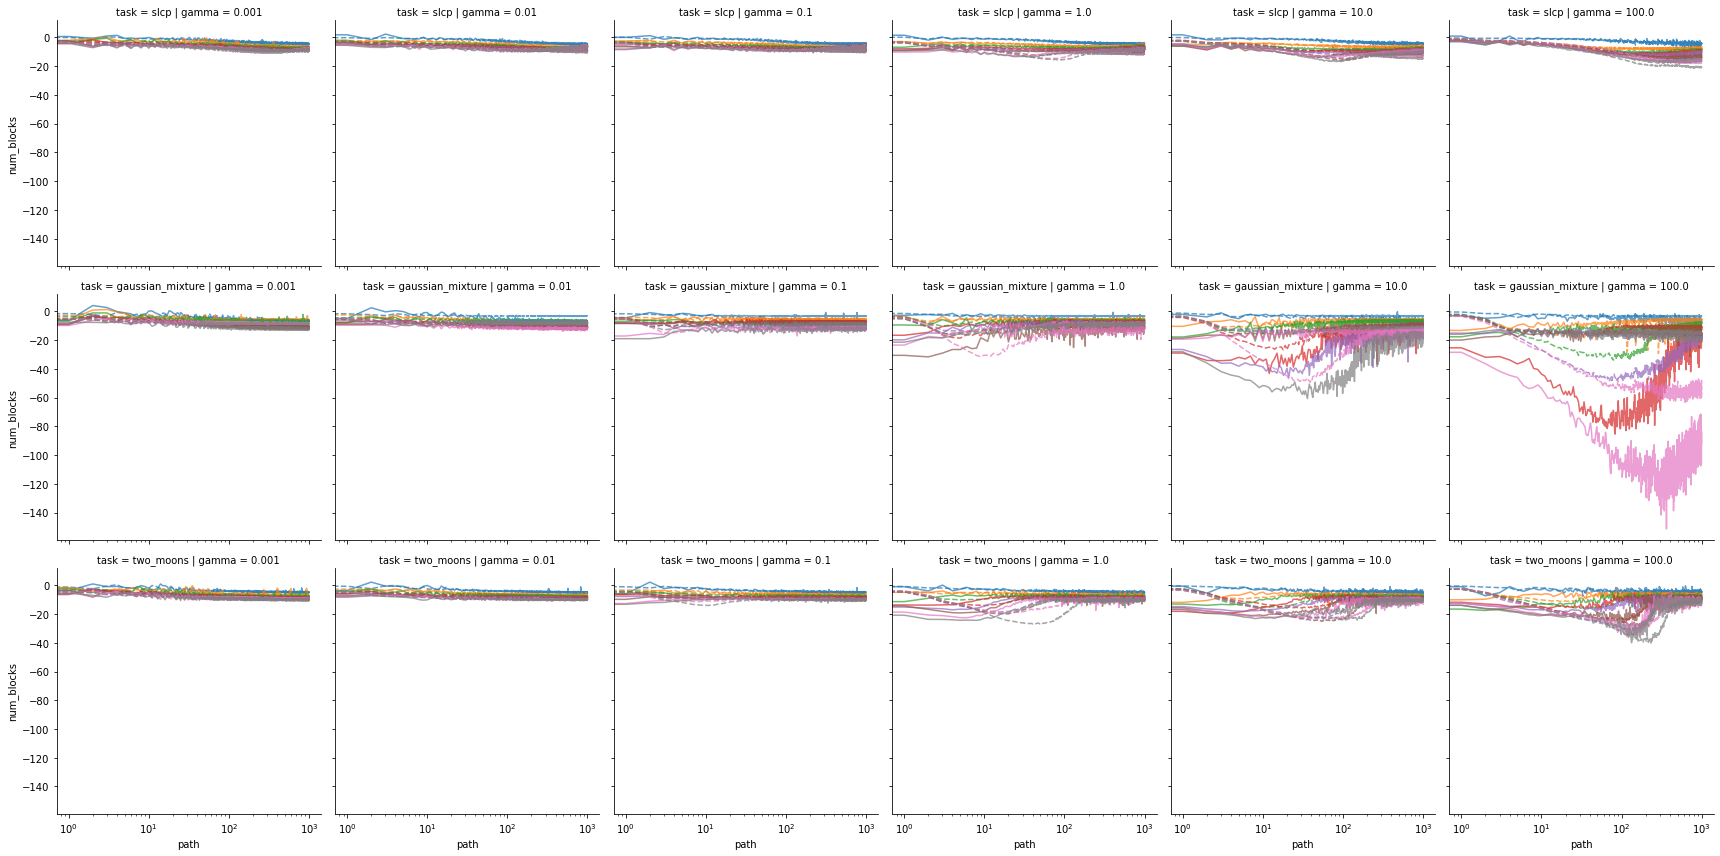

In [19]:
df_cnre_prior = df[(df["algorithm"] == "CNRE") & (df["expr"] == "prior")]
g = sns.FacetGrid(
    df_cnre_prior, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="gamma", 
    height=4,
)
g.map(plot_avg_log_ratios, "path", "num_blocks")

### validation loss

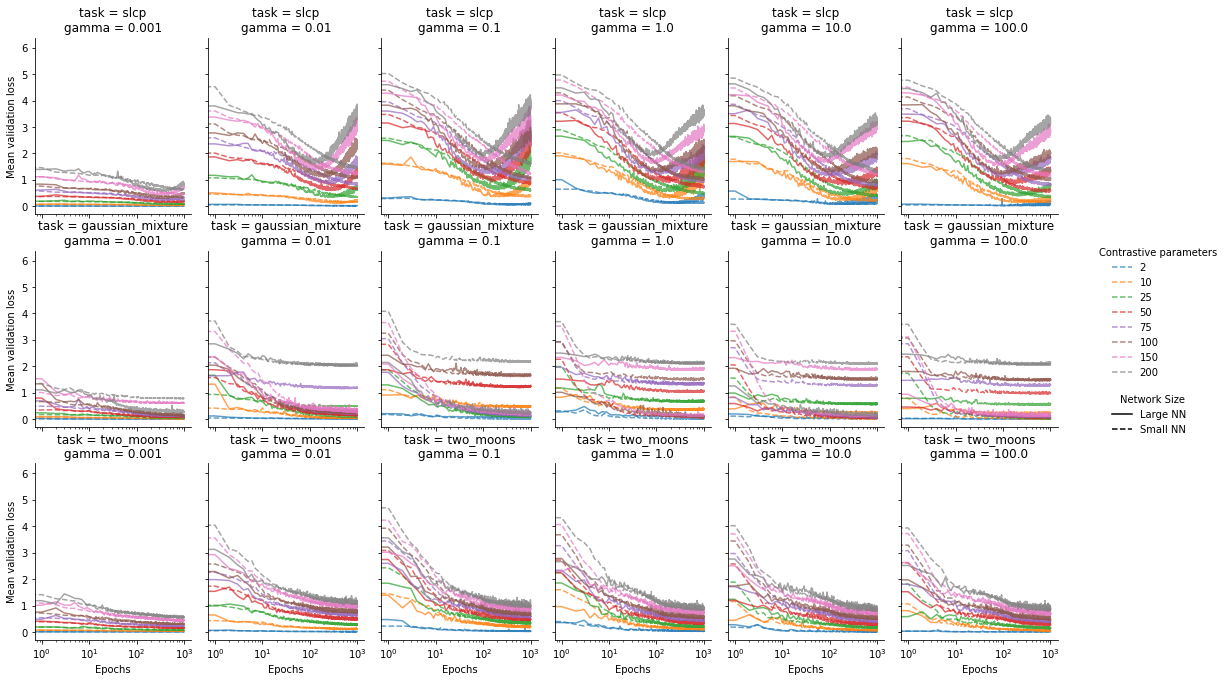

In [20]:
g = sns.FacetGrid(
    df_cnre_prior, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="gamma", 
    height=height,
)
g.map(plot_validation_loss, "path", "num_blocks")

title_proxy = Rectangle((0,0), 0, 0, color='w')
solid_proxy = Line2D([], [], color="k", linestyle="-")
dashd_proxy = Line2D([], [], color="k", linestyle="--")

legend_data = g._legend_data
title_text = "\nNetwork Size"
legend_data[title_text] = title_proxy
legend_data["Large NN"] = solid_proxy
legend_data["Small NN"] = dashd_proxy

g.add_legend(legend_data=legend_data, label_order=legend_data.keys(), )

for item, label in zip(g.legend.legendHandles, g.legend.texts):
    if label._text  in [title_text]:
        width=item.get_window_extent(fig.canvas.get_renderer()).width
        label.set_ha('left')
        label.set_position((-1*width,0))

g.legend.set_title("Contrastive parameters")

for ax in g.axes[:, 0]:
    ax.set_ylabel("Mean validation loss")

for ax in g.axes[-1, :]:
    ax.set_xlabel("Epochs")

for ax in g.axes.flatten():
    title_parts = [x.strip() for x in ax.get_title().split("|")]
    ax.set_title(f"{title_parts[0]}\n{title_parts[1]}")
plt.subplots_adjust(top=1.2)

plt.savefig("grid-validation-prior.pdf", dpi=300, bbox_inches="tight")

In [21]:
raise NotImplementedError()

NotImplementedError: 

#### cnre

In [ ]:
def get_train_seq_cnre(task: str, gamma: float, filename: str = "avg_log_ratios.csv", num_blocks: int = 2):
    algorithm = "CNRE"

    columns = ["algorithm", "task", "num_contrastive_parameters", "num_blocks", "gamma"]
    grp = df.groupby(columns)

    options = ([algorithm], df["task"].unique(), df["num_contrastive_parameters"].unique(), df["num_blocks"].unique(), [gamma])
    categories = list(product(*options))

    subdfs = []
    failed = []
    for cat in categories:
        try:
            subdfs.append(grp.get_group(cat).iloc[[0], :])
        except KeyError:
            failed.append(cat)
            continue
    subdf = pd.concat(subdfs)
    print(failed)

    d = subdf[(subdf["task"] ==  task) & (subdf["num_blocks"] == num_blocks)]
    d = d.sort_values("num_contrastive_parameters")
    fig, ax = plt.subplots()
    for _, row in d.iterrows():
        ax.plot(get_tensor_from_csv(Path(row["path"]) / filename), label=row["num_contrastive_parameters"])
    ax.legend()

In [ ]:
algorithm = "CNRE"
filename = "avg_log_ratios.csv"
task = "slcp"
num_blocks = 2

columns = ["algorithm", "task", "num_contrastive_parameters", "num_blocks", "gamma"]
grp = df.groupby(columns)

options = ([algorithm], df["task"].unique(), df["num_contrastive_parameters"].unique(), df["num_blocks"].unique(), [1.0])
categories = list(product(*options))

subdfs = []
failed = []
for cat in categories:
    try:
        subdfs.append(grp.get_group(cat).iloc[[0], :])
    except KeyError:
        failed.append(cat)
        continue
subdf = pd.concat(subdfs)
print(failed)

d = subdf[(subdf["task"] ==  task) & (subdf["num_blocks"] == num_blocks)]
d = d.sort_values("num_contrastive_parameters")
fig, ax = plt.subplots()
for _, row in d.iterrows():
    ax.plot(get_tensor_from_csv(Path(row["path"]) / filename), label=row["num_contrastive_parameters"])
ax.legend()

#### nre-b

In [ ]:
algorithm = "NRE-B"
filename = "avg_log_ratios.csv"
task = "slcp"
num_blocks = 2

columns = ["algorithm", "task", "num_contrastive_parameters", "num_blocks"]
grp = df.groupby(columns)

options = ([algorithm], df["task"].unique(), df["num_contrastive_parameters"].unique(), df["num_blocks"].unique())
categories = list(product(*options))

subdfs = []
failed = []
for cat in categories:
    try:
        subdfs.append(grp.get_group(cat).iloc[[0], :])
    except KeyError:
        failed.append(cat)
        continue
subdf = pd.concat(subdfs)
print(failed)

d = subdf[(subdf["task"] ==  task) & (subdf["num_blocks"] == num_blocks)]
d = d.sort_values("num_contrastive_parameters")
fig, ax = plt.subplots()
for _, row in d.iterrows():
    ax.plot(get_tensor_from_csv(Path(row["path"]) / filename), label=row["num_contrastive_parameters"])
ax.legend()